# <a style = background:lightgreen;color:black>Outcome and Duration Prediction on train_od (modeling) </a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('../DATA/final_train_od_dummies.csv')

You have to encode target (Outcome) labels with value between 0 and n_classes-1.

In [3]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(np.array(data['Outcome']).ravel())
data['Outcome'] = le.transform(np.array(data['Outcome']).ravel())

In [4]:
X = data[['Tax Related', 'Number of Lawyers',
     'Number of Legal Parties', 'Value formatted',
       'Unified Contribution formatted', 'Milano', 'Bari', 'Bologna', 'Genova',
       'Palermo', 'Napoli', 'Torino', 'Trento', 'Roma', "L'Aquila", 'Potenza',
       'Perugia', 'Campobasso', 'Firenze', 'Cagliari', 'Venezia', 'Cosenza',
       'Ancona', 'Trieste', 'Aosta','OR-140999', 'OR-145009', 'OR-139999',
       'OR-145999', 'OR-130099', 'OR-101003', 'OR-130121', 'OR-130111',
       'OR-130131', 'OR-101002', 'OR-180002', 'OSA-180002','OSA-180099','OSA-180001','OSA-140999','OSA-145999']]

y = data[['Duration', 'Outcome']]

## <a style=background:yellow;color:black> Standardization and Split in training, validation and testing set </a>

You need to scale just the variables that are neither dummies nor boolean.

In [5]:
X_to_scale = X[['Number of Lawyers','Number of Legal Parties', 'Value formatted',
       'Unified Contribution formatted']]
X_not_to_scale = X[['Tax Related','Milano', 'Bari', 'Bologna', 'Genova',
       'Palermo', 'Napoli', 'Torino', 'Trento', 'Roma', "L'Aquila", 'Potenza',
       'Perugia', 'Campobasso', 'Firenze', 'Cagliari', 'Venezia', 'Cosenza',
       'Ancona', 'Trieste', 'Aosta','OR-140999', 'OR-145009', 'OR-139999',
       'OR-145999', 'OR-130099', 'OR-101003', 'OR-130121', 'OR-130111',
       'OR-130131', 'OR-101002', 'OR-180002', 'OSA-180002','OSA-180099','OSA-180001','OSA-140999','OSA-145999']]

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

y = pd.DataFrame(y)
std_scale = StandardScaler()
X_scaled = std_scale.fit_transform(X_to_scale)

In [7]:
X_scaled_df = pd.DataFrame(X_scaled, columns=[X_to_scale.columns])
X_scaled_df = pd.concat([X_scaled_df, X_not_to_scale], axis=1)

In [8]:
new_var_names = []
for var_name in X_scaled_df.columns:
    if '(' not in var_name:
        new_var_names.append(var_name)
    else:
        new_var_names.append(var_name.replace('(', '').replace(')', '')
        .replace('\'','').replace(',','').replace('"',''))
new_var_names = []
for var_name in X_scaled_df.columns:
    if type(var_name) != tuple:
        new_var_names.append(var_name)
    else:
        new_var_names.append(var_name[0])

X_scaled_df = pd.DataFrame(X_scaled_df.values, columns=new_var_names)

In [9]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X_scaled_df, y, random_state=0,
                                                            test_size=0.1)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val,random_state=0,
                                                            test_size=0.2  )

In [10]:
y_train_val_duration = y_train_val['Duration']
y_train_val_Outcome = y_train_val['Outcome']
y_test_duration = y_test['Duration']
y_test_Outcome = y_test['Outcome']
y_train_duration = y_train['Duration']
y_train_Outcome = y_train['Outcome']
y_val_duration = y_val['Duration']
y_val_Outcome = y_val['Outcome']
y_train_val_duration = pd.DataFrame(y_train_val_duration)
y_train_val_Outcome = pd.DataFrame(y_train_val_Outcome)
y_test_duration = pd.DataFrame(y_test_duration)
y_test_Outcome = pd.DataFrame(y_test_Outcome)
y_train_duration = pd.DataFrame(y_train_duration)
y_train_Outcome = pd.DataFrame(y_train_Outcome )
y_val_duration = pd.DataFrame(y_val_duration)
y_val_Outcome = pd.DataFrame(y_val_Outcome)

# <a style=background:yellow;color:black> Models <a>

## <a style=background:yellow;color:black> CLASSIFICATION TASK </a>

### <a style=background:yellow;color:black> Random forest Classification</a>

<a style=color:red> During the training I got 0.43 of f1_score on the test set. I don't know what happened. Maybe it's better deliting it </a>

Due to the lack of computational power, we cannot use the GridSearchCV sklearn function to find the best parameters for the Random Forest Classifier. We will do it by hand and save the result of each random forest locally. Actually not all the results are saved: at each step we check if the f1_score is better than the previous one and if it is the case we save the result, otherwise we just change the name of the one we saved before (in order to understand where we left in case the runtime died).

In [11]:
import itertools as it
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# param_grid = {'max_depth':np.arange(1,8),
#                'min_samples_split':np.arange(5,100,10),
#                'min_samples_leaf':np.arange(5,100,10),
#                'n_estimators':np.arange(1,500,50)}


# allNames = sorted(param_grid)
# combinations = it.product(*(param_grid[Name] for Name in allNames))
# combinations = list(combinations)

# df = pd.DataFrame(combinations, columns=param_grid.keys())

# start_point = int(input('START POINT:'))
# end_point = int(input('END POINT:'))


# # best_f1 = np.load('../RFC/'+os.listdir('../RFC')[-1],allow_pickle=True)[1]
# best_f1 = 0 
# for i in range(start_point,end_point):
#   clf = RandomForestClassifier(max_depth = df.iloc[i][0],
#                                min_samples_split = df.iloc[i][1],
#                                min_samples_leaf = df.iloc[i][2],
#                                n_estimators = df.iloc[i][3],
#                                class_weight = 'balanced',
#                                n_jobs=1)
#   clf.fit(X_train_val, np.array(y_train_val_Outcome).ravel())
#   clf_val = np.array([clf.get_params(), f1_score(np.array(y_test_Outcome).ravel(),clf.predict(X_test), average = 'weighted')])
#   if clf_val[1]>best_f1:
#     best_f1 = clf_val[1]
#     #np.save(os.path.join('/content/drive/MyDrive/RFC/', 'best_up_to_' + str(i)), clf_val)
#     np.save(os.path.join('../RFC', 'best_up_to_'+str(i)),clf_val)
#   else:
#     # os.rename('/content/drive/MyDrive/RFC/' + os.listdir('/content/drive/MyDrive/RFC/')[-1],
#     #           os.path.join('/content/drive/MyDrive/RFC/', 'best_up_to_' + str(i) + '.npy'))
#     os.rename('../RFC/'+os.listdir('../RFC')[-1], os.path.join('../RFC', 'best_up_to_'+str(i)+'.npy'))
    

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,precision_score
from sklearn.metrics import recall_score,f1_score,ConfusionMatrixDisplay
import matplotlib.pyplot as plt

best_rnd_for_clf = RandomForestClassifier()
best_rnd_for_clf.set_params(**np.load('../RFC/'+os.listdir('../RFC')[-1],allow_pickle=True)[0])
best_rnd_for_clf.fit(X_train_val, np.array(y_train_val_Outcome).ravel())

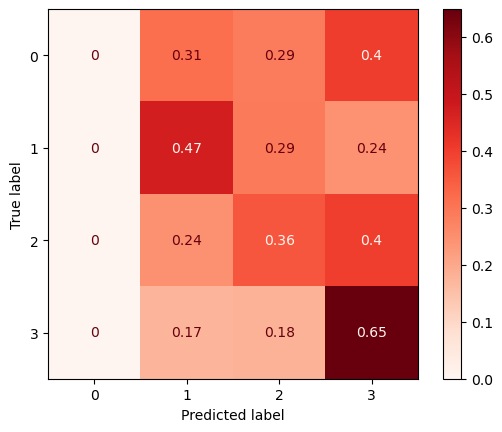

In [33]:
y_pred_Outcome_rnd_for = best_rnd_for_clf.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test_Outcome,y_pred_Outcome_rnd_for, normalize = "true", cmap = "Reds")
plt.show()

In [ ]:
f1_rnd_for = f1_score(y_test_Outcome, y_pred_Outcome_rnd_for,average = 'weighted')
precision_rnd_for = precision_score(y_test_Outcome,y_pred_Outcome_rnd_for,average = 'weighted')
recall_rnd_for = recall_score(y_test_Outcome,y_pred_Outcome_rnd_for,average ='weighted')

print("precision:", precision_rnd_for)
print("recall:", recall_rnd_for)
print("f1 score:", f1_rnd_for)

In [48]:
confusion_matrix(y_test_Outcome, y_pred_Outcome_rnd_for)

array([[   0, 4385, 4053, 5627],
       [   0,  525,  323,  271],
       [   0, 1961, 2879, 3212],
       [   0,  342,  348, 1271]])

### <a style=background:yellow;color:black> XGBOOST Classification </a>

In [25]:
import xgboost
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
xgb_class = xgboost.XGBClassifier(n_estimators = 300,random_state = 42,eval_metric = 'merror')
xgb_class.fit(X_train,y_train_Outcome,eval_set = [(X_val,y_val_Outcome)],early_stopping_rounds = 15)

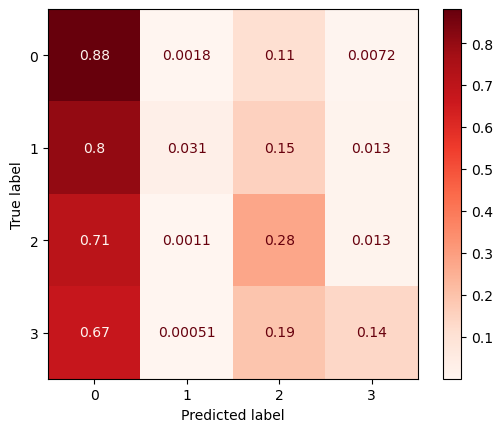

In [46]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
y_pred_Outcome_xgb = xgb_class.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test_Outcome,y_pred_Outcome_xgb, normalize = "true", cmap = "Reds")
plt.show()

In [41]:
f1_xgb = f1_score(y_test_Outcome, y_pred_Outcome_xgb,average = 'weighted')
precision_xgb = precision_score(y_test_Outcome,y_pred_Outcome_xgb,average = 'weighted')
recall_xgb = recall_score(y_test_Outcome,y_pred_Outcome_xgb,average ='weighted')

print("precision:", precision_xgb)
print("recall:", recall_xgb)
print("f1 score:", f1_xgb)

precision: 0.5704663902382515
recall: 0.59237210779061
f1 score: 0.5372173890480365


In [79]:
conf_matrix = confusion_matrix(y_test_Outcome, y_pred_Outcome_xgb)
print(conf_matrix)

precisions =[] 

for i in range(4):
    precisions.append(conf_matrix[i,i]/np.sum(conf_matrix[:,i]))
    print('Precision for class {}: {}'.format(i,precisions[i]), 'n.obs: {}'.format(np.sum(conf_matrix[:,i])))

overall_precision = 0
for i in range(4):
    overall_precision += precisions[i]*np.sum(y_test_Outcome==i)/len(y_test_Outcome)
    
print('Overall Precision: {}'.format(overall_precision.to_numpy()))

[[12392    25  1547   101]
 [  897    35   173    14]
 [ 5708     9  2233   102]
 [ 1321     1   373   266]]
Precision for class 0: 0.6099025494635298 n.obs: 20318
Precision for class 1: 0.5 n.obs: 70
Precision for class 2: 0.5161812297734628 n.obs: 4326
Precision for class 3: 0.5507246376811594 n.obs: 483
Overall Precision: [0.57046639]


### <a style=background:yellow;color:black> Neural Network Classification </a>

In [13]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix,precision_score
from sklearn.metrics import recall_score,f1_score,ConfusionMatrixDisplay
import os

In [36]:
tf.random.set_seed(42)
keras.backend.clear_session() 
np.random.seed(42)

In [37]:
def get_run_logdir(root_logdir, model_name):
    import time
    run_id = time.strftime('run_%Y_%m_%d-%H_%M_%S')
    return os.path.join(root_logdir, model_name+'_'+run_id)

model_name = input('Enter model name: ')
root_logdir = os.path.join(os.curdir,'..', 'my_logs')
run_logdir = get_run_logdir(root_logdir, model_name)

early_stop_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir,
                                            histogram_freq=1)

In [ ]:
NN_class = keras.models.Sequential([
    keras.layers.Dense(1024,activation = 'relu',kernel_initializer='he_normal',input_shape = X_train.shape[1:]),
    keras.layers.Dense(512,activation = 'relu',kernel_initializer='he_normal'),
    keras.layers.Dense(256,activation = 'relu',kernel_initializer='he_normal'),
    keras.layers.Dense(128,activation = 'relu',kernel_initializer='he_normal'),
    keras.layers.Dense(56,activation = 'relu',kernel_initializer='he_normal'),
    keras.layers.Dense(4,activation = 'softmax')
])

In [39]:
NN_class.compile(loss = "sparse_categorical_crossentropy",optimizer = "adam",metrics = ['Accuracy'])
history_class = NN_class.fit(X_train,y_train_Outcome,epochs = 30,validation_data = (X_val,y_val_Outcome),callbacks=[tensorboard_cb, early_stop_cb])

Epoch 1/30


2023-01-14 23:29:40.334996: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-01-14 23:29:40.562505: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5670/5670 [==============================] - ETA: 0s - loss: 0.9465 - Accuracy: 0.5697

2023-01-14 23:30:22.900760: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5670/5670 [==============================] - 48s 8ms/step - loss: 0.9465 - Accuracy: 0.5697 - val_loss: 0.9371 - val_Accuracy: 0.5724
Epoch 2/30
5670/5670 [==============================] - 48s 8ms/step - loss: 0.9296 - Accuracy: 0.5768 - val_loss: 0.9313 - val_Accuracy: 0.5771
Epoch 3/30
5670/5670 [==============================] - 49s 9ms/step - loss: 0.9241 - Accuracy: 0.5788 - val_loss: 0.9311 - val_Accuracy: 0.5782
Epoch 4/30
5670/5670 [==============================] - 46s 8ms/step - loss: 0.9207 - Accuracy: 0.5812 - val_loss: 0.9288 - val_Accuracy: 0.5793
Epoch 5/30
5670/5670 [==============================] - 49s 9ms/step - loss: 0.9193 - Accuracy: 0.5816 - val_loss: 0.9247 - val_Accuracy: 0.5790
Epoch 6/30
5670/5670 [==============================] - 50s 9ms/step - loss: 0.9165 - Accuracy: 0.5833 - val_loss: 0.9274 - val_Accuracy: 0.5804
Epoch 7/30
5670/5670 [==============================] - 51s 9ms/step - loss: 0.9164 - Accuracy: 0.5844 - val_loss: 0.9244 - val_Accuracy: 0.5

In [ ]:
!tensorboard --logdir=../my_logs --port=6006

 44/788 [>.............................] - ETA: 1s

2023-01-14 23:49:19.855527: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


788/788 [==============================] - 2s 2ms/step


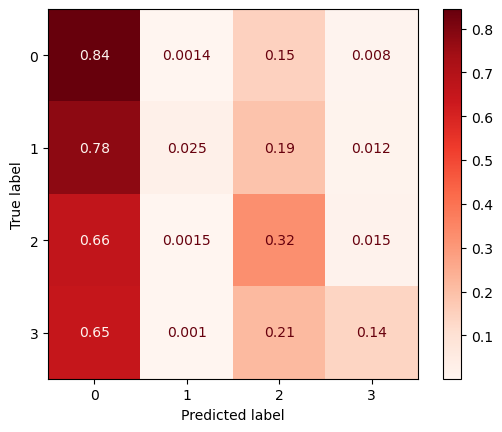

In [40]:
y_pred_Outcome_NN = np.argmax(NN_class.predict(X_test),axis=1)
ConfusionMatrixDisplay.from_predictions(y_test_Outcome,y_pred_Outcome_NN, normalize = "true", cmap = "Reds")
plt.show()

In [41]:
f1_NN = f1_score(y_test_Outcome,y_pred_Outcome_NN,average = 'weighted')
precision_NN = precision_score(y_test_Outcome,y_pred_Outcome_NN,average = 'weighted')
recall_NN = recall_score(y_test_Outcome,y_pred_Outcome_NN,average ='weighted')

print("precision:", precision_NN)
print("recall:", recall_NN)
print("f1 score:", f1_NN)

precision: 0.5617734796814394
recall: 0.5868555780450053
f1 score: 0.5412687022490835


In [78]:
conf_matrix = confusion_matrix(y_test_Outcome, y_pred_Outcome_NN)
print(conf_matrix)

precisions =[] 

for i in range(4):
    precisions.append(conf_matrix[i,i]/np.sum(conf_matrix[:,i]))
    print('Precision for class {}: {}'.format(i,precisions[i]), 'n.obs: {}'.format(np.sum(conf_matrix[:,i])))

overall_precision = 0
for i in range(4):
    overall_precision += precisions[i]*np.sum(y_test_Outcome==i)/len(y_test_Outcome)
    
print('Overall Precision: {}'.format(overall_precision.to_numpy()))

[[11878    20  2055   112]
 [  869    28   209    13]
 [ 5313    12  2609   118]
 [ 1270     2   417   272]]
Precision for class 0: 0.6144852560786342 n.obs: 19330
Precision for class 1: 0.45161290322580644 n.obs: 62
Precision for class 2: 0.49319470699432894 n.obs: 5290
Precision for class 3: 0.5281553398058253 n.obs: 515
Overall Precision: [0.56177348]


In [44]:
import joblib

# joblib.dump(NN_class, '../models/NN_clf_train_od_not_balanced.sav')
# rnd_reg = joblib.load('../models/NN_clf_train_od_not_balanced.sav')

INFO:tensorflow:Assets written to: ram://63bf539b-08cf-4369-af66-488aa746baec/assets


['../models/NN_clf_train_od_not_balanced.sav']

## <a style=background:yellow;color:black> Dealing with the unbalance</a>

In [11]:
train_data = pd.concat([X_train, y_train['Outcome']], axis=1, join='inner')

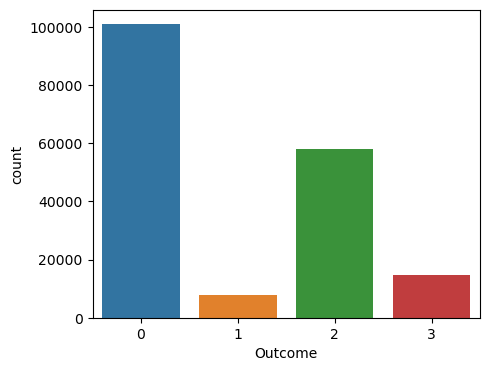

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
f, axs = plt.subplots(1, figsize=(5,4))
sns.countplot(x=train_data['Outcome'], ax=axs)
plt.show()

In [13]:
df_class_0 = train_data[train_data.Outcome==0]
df_class_1 = train_data[train_data.Outcome==1]
df_class_2 = train_data[train_data.Outcome==2]
df_class_3 = train_data[train_data.Outcome==3]

New sample size equal to lowest sample's size to avoid synthetic data (we already have a lot of data) 

In [14]:
min_sample_nbr = min(train_data['Outcome'].value_counts().tolist())

#We perform the resampling 
df_class3_downsampled = df_class_3.sample(n = min_sample_nbr)
df_class2_downsampled = df_class_2.sample(n = min_sample_nbr)
df_class0_downsampled = df_class_0.sample(n = min_sample_nbr)

#We re-assemble the resampled dataframes and shuffle them
data_balanced = pd.concat([df_class3_downsampled,df_class0_downsampled, df_class2_downsampled, df_class_1], ignore_index=True)
data_balanced = data_balanced.sample(frac = 1, random_state = 1).reset_index()

<AxesSubplot: xlabel='Outcome', ylabel='count'>

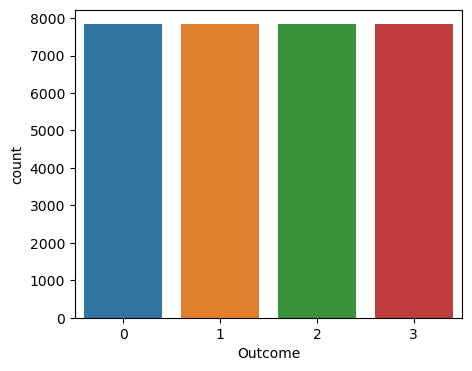

In [15]:
f, axs = plt.subplots(1, figsize=(5,4))
sns.countplot(x=data_balanced['Outcome'], ax=axs)

In [16]:
del data_balanced['index'] #not always necessary

In [17]:
X_train = data_balanced[['Number of Lawyers','Number of Legal Parties', 
       'Value formatted','Unified Contribution formatted', 'Tax Related','Milano', 'Bari', 'Bologna', 'Genova',
       'Palermo', 'Napoli', 'Torino', 'Trento', 'Roma', "L'Aquila", 'Potenza',
       'Perugia', 'Campobasso', 'Firenze', 'Cagliari', 'Venezia', 'Cosenza',
       'Ancona', 'Trieste', 'Aosta','OR-140999', 'OR-145009', 'OR-139999',
       'OR-145999', 'OR-130099', 'OR-101003', 'OR-130121', 'OR-130111',
       'OR-130131', 'OR-101002', 'OR-180002', 'OSA-180002',
       'OSA-180099','OSA-180001','OSA-140999','OSA-145999']]
y_train = data_balanced['Outcome']

### <a style=background:yellow;color:black> Neural Network Unbalance</a>

In [18]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [19]:
tf.random.set_seed(42)
keras.backend.clear_session() 
np.random.seed(42)

In [20]:
def get_run_logdir(root_logdir, model_name):
    import time
    run_id = time.strftime('run_%Y_%m_%d-%H_%M_%S')
    return os.path.join(root_logdir, model_name+'_'+run_id)

model_name = input('Enter model name: ')
root_logdir = os.path.join(os.curdir,'..', 'my_logs')
run_logdir = get_run_logdir(root_logdir, model_name)

early_stop_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir,
                                            histogram_freq=1)

In [ ]:
NN_class = keras.models.Sequential([
    keras.layers.Dense(256,activation = 'relu',kernel_initializer='he_normal',input_shape = X_train.shape[1:]),
    keras.layers.Dense(512,activation = 'relu',kernel_initializer='he_normal'),
    keras.layers.Dense(256,activation = 'relu',kernel_initializer='he_normal'),
    keras.layers.Dense(128,activation = 'relu',kernel_initializer='he_normal'),
    keras.layers.Dense(64,activation = 'relu',kernel_initializer='he_normal'),
    keras.layers.Dense(32,activation = 'relu',kernel_initializer='he_normal'),
    keras.layers.Dense(4,activation = 'softmax')
])


In [ ]:
NN_class.compile(loss = "sparse_categorical_crossentropy",optimizer = "adam",metrics = ['Accuracy'])
history_class = NN_class.fit(X_train,y_train,epochs = 30,validation_data = (X_val,y_val_Outcome))

In [ ]:
!tensorboard --logdir=../my_logs --port=6006

788/788 [==============================] - 2s 3ms/step


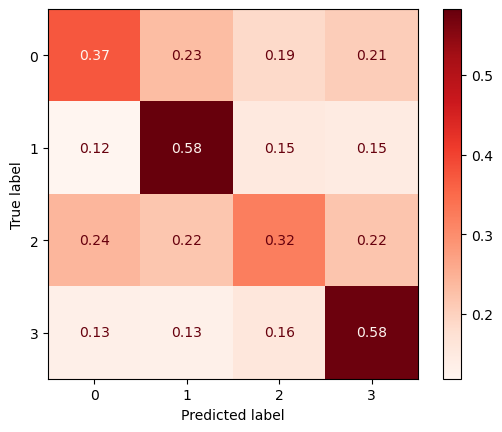

In [25]:
y_pred_Outcome_NN = np.argmax(NN_class.predict(X_test),axis=1)
ConfusionMatrixDisplay.from_predictions(y_test_Outcome,y_pred_Outcome_NN, normalize = "true", cmap = "Reds")
plt.show()

In [26]:
f1_NN = f1_score(y_test_Outcome,y_pred_Outcome_NN,average = 'weighted')
precision_NN = precision_score(y_test_Outcome,y_pred_Outcome_NN,average = 'weighted')
recall_NN = recall_score(y_test_Outcome,y_pred_Outcome_NN,average ='weighted')

print("precision:", precision_NN)
print("recall:", recall_NN)
print("f1 score:", f1_NN)

precision: 0.5512882227781478
recall: 0.3819502321704965
f1 score: 0.4215651363951117


## <a style=background:yellow;color:black> REGRESSION TASK </a>

### <a style=background:yellow;color:black> Random forest Regression</a>

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [37]:
rnd_reg = RandomForestRegressor(n_estimators=300,random_state = 42)

rnd_reg.fit(X_train_val, y_train_val_duration)

y_pred_duration_rnd_for = rnd_reg.predict(X_test)

print(mean_absolute_error(y_test_duration,y_pred_duration_rnd_for))

/var/folders/j3/6zzd1jr16pb3yxx70_376pmw0000gn/T/ipykernel_3320/3614527034.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rnd_reg.fit(X_train_val, y_train_val_duration)


233.22475564117414


In [ ]:
import joblib

# joblib.dump(rnd_reg, '../models/rnd_for_reg_train_od.sav')
# rnd_reg = joblib.load('../models/rnd_for_reg_train_od.sav')

### <a style=background:yellow;color:black> XGBOOST Regression </a>

In [ ]:
import xgboost
from sklearn.metrics import mean_absolute_error

In [ ]:
xgb_reg = xgboost.XGBRegressor(n_estimators = 300,random_state = 42,eval_metric = 'mae')
xgb_reg.fit(X_train,y_train_duration,eval_set = [(X_val,y_val_duration)],early_stopping_rounds = 15)

In [ ]:
y_pred_duration_xgb = xgb_reg.predict(X_test)
mean_absolute_error(y_test_duration,y_pred_duration_xgb)

### <a style=background:yellow;color:black> Neural Network Regression</a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_absolute_error

In [ ]:
tf.random.set_seed(42)
keras.backend.clear_session() 
np.random.seed(42)

In [ ]:
def get_run_logdir(root_logdir, model_name):
    import time
    run_id = time.strftime('run_%Y_%m_%d-%H_%M_%S')
    return os.path.join(root_logdir, model_name+'_'+run_id)

model_name = input('Enter model name: ')
root_logdir = os.path.join(os.curdir,'..', 'my_logs')
run_logdir = get_run_logdir(root_logdir, model_name)

early_stop_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir,
                                            histogram_freq=1)

In [ ]:
NN_reg = keras.models.Sequential([
    keras.layers.Dense(128,activation = 'relu',kernel_initializer='he_normal',input_shape = X_train.shape[1:]),
    keras.layers.Dense(256,activation = 'relu',kernel_initializer='he_normal'),
    keras.layers.Dense(512, kernel_initializer='he_normal',activation='relu'),
    keras.layers.Dense(256,activation = 'relu',kernel_initializer='he_normal'),
    keras.layers.Dense(128,activation='relu',kernel_initializer='he_normal'),
    keras.layers.Dense(1,activation = 'relu') #relu because i want only positive numbers
])

In [ ]:
NN_reg.compile(loss = 'mean_absolute_error',optimizer = 'adam')
history_reg = NN_reg.fit(X_train,y_train_duration,epochs = 30,validation_data = (X_val,y_val_duration), callbakcs=[tensorboard_cb, early_stop_cb])

In [ ]:
!tensorboard --logdir=../my_logs --port=6006

In [ ]:
y_pred_duration_NN = NN_reg.predict(X_test)
mean_absolute_error(y_test_duration,y_pred_duration_NN)